# Hyperparameter prediction using SVR

Using hyperparameter as input to predict `best_acc`.

Input are:
- `learning_rate`
- `hyper`
- `batch_size`
- `filters_1`
- `filters_2`
- `full_hidd_1`
- `full_hidd_2`
- `ksize_1`
- `ksize_2`
- `no_epochs`


Note: we have to remove `best_acc` and `best_loss` as those are not available during prediction time for training data

## Table of content
* [Importing libraries](#Importing-libraries-and-reading-from-csv-file)
* [Preparing datasets](#Preparing-datasets)
* [Feature scaling](#Feature-scaling) as of now is commented - is it required ? 
* [SVR Model training - poly](#Fitting-the-SVR-model)
* [Splitting into train and test](#Splitting-the-data-into-train-and-test)
* [PCA to visualize input](#Using-PCA-to-visualize-input-in-2D)

### Importing libraries and reading from csv file

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

sns.set(style="ticks")

In [4]:
dataset = pd.read_csv('hyperp.csv')
dataset.head()

,filters1,ksize1,filters2,ksize2,filters3,ksize3,full_hidd1,full_hidd2,activation,learning_rate,batch_size,momentum,optimizer,best_loss,best_acc,best_train_acc,best_train_loss,no_epochs,logdir
0,64,5,64,5,128,5,125,80,relu,0.002,32,0.99,adam,0.850903,0.7222,0.719596,0.788537,11,./log/run-20190731T202129/
1,32,5,96,4,128,3,125,80,relu,0.002,32,0.99,adam,0.901699,0.6919,0.698909,0.858828,10,./log/run-20190731T202250/
2,32,3,64,4,128,5,125,100,relu,0.002,64,0.99,adam,0.890156,0.6976,0.687631,0.896935,10,./log/run-20190731T202353/
3,96,5,48,5,128,4,100,125,relu,0.001,128,0.95,rmsprop,1.003658,0.6639,0.645796,0.988493,10,./log/run-20190731T202433/
4,32,4,64,3,128,3,100,80,lrelu,0.002,64,0.95,rmsprop,1.103251,0.6293,0.627815,1.055303,10,./log/run-20190731T202515/


### Preparing datasets

In [5]:
input_cols = [
    "learning_rate",
    "batch_size", "filters1",
    "filters2","filters3", "full_hidd1", 
    "full_hidd2", "ksize1", 
    "ksize2", "ksize3", "no_epochs", 
]

#"activation", "momentum", "optimizer"
output_cols = ["best_acc"]

In [6]:
x = dataset[input_cols].values
y = dataset[output_cols].values

### Splitting the data into train and test

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### Using PCA to visualize input in 2D

In [8]:
pca = PCA(n_components=2)
pcom = pca.fit_transform(x)
pca_df = pd.DataFrame(data=pcom, columns=["pca_1", "pca_2"])
finalpca_df = pd.concat([pca_df, dataset[output_cols]], axis = 1)

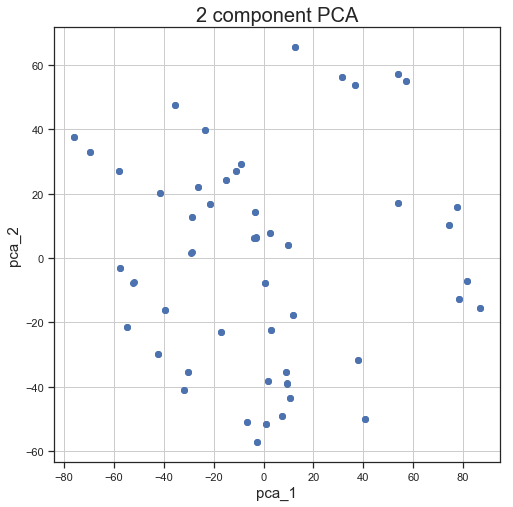

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel("pca_1", fontsize = 15)
ax.set_ylabel("pca_2", fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalpca_df["pca_1"], finalpca_df["pca_2"])
ax.grid()

### Feature scaling 

In [10]:
# from sklearn.preprocessing import StandardScaler
# standardscaler_x = StandardScaler()
# x = standardscaler_x.fit_transform(x)
# standardscaler_y = StandardScaler()
# y = standardscaler_y.fit_transform(y)

In [11]:
# reshape to 1d array, necessary for model.
# y = y.reshape(len(y),)

### Fitting the SVR model
- using train dataset to train SVR
- using test dataset to evaluate SVR performance

#### Using poly kernel

In [12]:
reg_poly_model = SVR(kernel='poly').fit(x_train,y_train)
reg_poly_model

c:\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Training r-squared

In [13]:
y_train_predict = reg_poly_model.predict(x_train)
print(r2_score(y_train, y_train_predict))

-1.3915659879905729


Testing r-squared

In [14]:
y_predict = reg_poly_model.predict(x_test)
print(r2_score(y_test, y_predict))

-5.229998874546062


#### Using rbf kernel

In [15]:
reg_rbf_model = SVR(kernel='rbf').fit(x_train,y_train)
reg_rbf_model

c:\python36\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

Training r-squared

In [16]:
y_train_predict = reg_rbf_model.predict(x_train)
print(r2_score(y_train, y_train_predict))

-1.3915659879905729


Testing r-squared

In [17]:
y_predict = reg_rbf_model.predict(x_test)
print(r2_score(y_test, y_predict))

-5.229998874546062


### Testing out using custom data point

In [18]:
# scaling test data for prediction
# test = np.zeros(1) # we are testing just one value
# test[0]= 6.5
# test = test.reshape(1,1) # reshape to 2D array!
# test = standardscaler_x.transform(test) # rescaling test data like train data

In [19]:
# inverse scaling y to real value
y_predict = standardscaler_y.inverse_transform(y_pred)

NameError: name 'standardscaler_y' is not defined